<a href="https://colab.research.google.com/github/ThuanPhong0126/CS114.K21/blob/master/QualityOfWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/My Drive/Colab Notebooks/ML/Quality of Wine

/content/drive/My Drive/Colab Notebooks/ML/Quality of Wine


In [3]:
pwd

'/content/drive/My Drive/Colab Notebooks/ML/Quality of Wine'

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thuanphong","key":"ffc8cd53940c5c0bf1c827618250572d"}'}

In [6]:
!pip install kaggle

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets list -s wine

ref                                        title                            size  lastUpdated          downloadCount  
-----------------------------------------  ------------------------------  -----  -------------------  -------------  
zynicide/wine-reviews                      Wine Reviews                     51MB  2017-11-27 17:08:04         101526  
uciml/red-wine-quality-cortez-et-al-2009   Red Wine Quality                 26KB  2017-11-27 23:41:08          40912  
rajyellow46/wine-quality                   Wine Quality                     98KB  2018-07-09 16:08:15           5259  
piyushgoyal443/red-wine-dataset            Red Wine Dataset                 29KB  2017-03-05 03:38:35           5356  
danielpanizzo/wine-quality                 Wine Quality                    108KB  2017-10-29 19:56:48           2091  
brynja/wineuci                             Classifying wine varieties        4KB  2017-06-20 23:13:05           2127  
maitree/wine-quality-selection             wine 

In [10]:
!kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 3.43MB/s]


In [11]:
!unzip red-wine-quality-cortez-et-al-2009.zip

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df=pd.read_csv('winequality-red.csv')

In [14]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


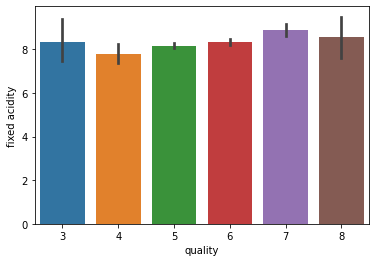

In [17]:
sns.barplot(data=df,x='quality',y='fixed acidity')
plt.show()

Here we see that fixed acidity doesn't give any specification to classify the quality.

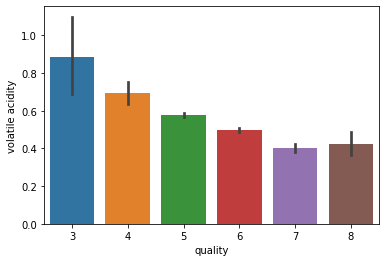

In [18]:
sns.barplot(data=df,x='quality',y='volatile acidity')
plt.show()

Here we that its quite a downing trend in the volatile acidity as we go higher thw quality

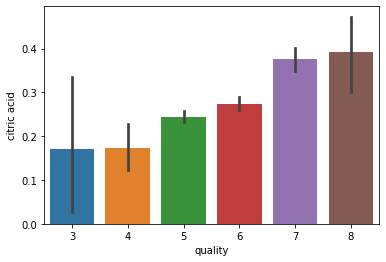

In [19]:
sns.barplot(data=df,x='quality',y='citric acid')
plt.show()

Composition of ciric acid go higher as we go higher in the quality of the wine.

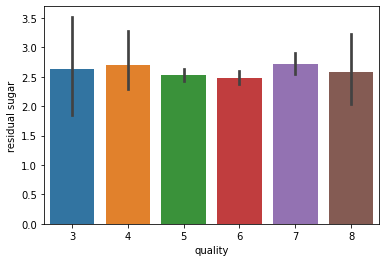

In [20]:
sns.barplot(data=df,x='quality',y='residual sugar')
plt.show()

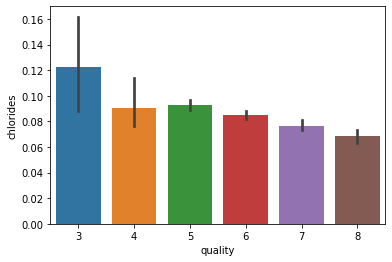

In [21]:
sns.barplot(data=df,x='quality',y='chlorides')
plt.show()

Composition of chloride also go down as we go higher in the quality of the wine.

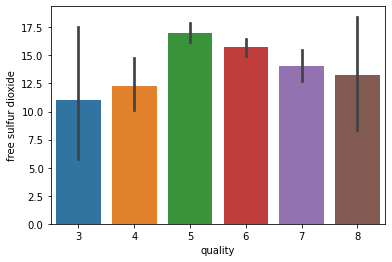

In [22]:
sns.barplot(data=df,x='quality',y='free sulfur dioxide')
plt.show()

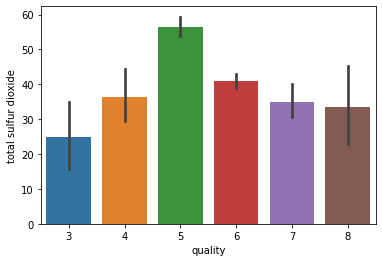

In [23]:
sns.barplot(data=df,x='quality',y='total sulfur dioxide')
plt.show()

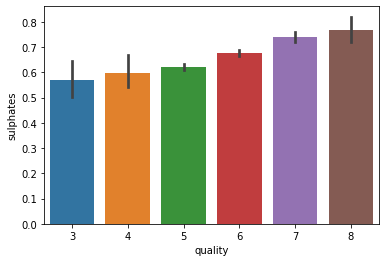

In [24]:
sns.barplot(data=df,x='quality',y='sulphates')
plt.show()

Sulphates lavel goes higher with the quality of wine.

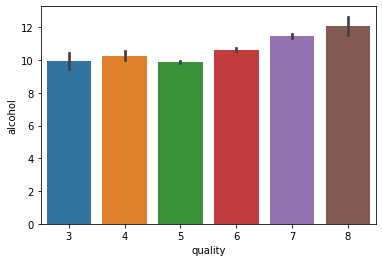

In [25]:
sns.barplot(data=df,x='quality',y='alcohol')
plt.show()

Alcohol lavel also goes higher as te quality of wine increases.

In [0]:
df['quality']=pd.cut(df['quality'],bins=[2,6.5,8],labels=['bad','good'])

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [0]:
label_quality=LabelEncoder()

In [0]:
df['quality']=label_quality.fit_transform(df['quality'])

In [30]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [0]:
X=df.drop('quality',axis=1)
y=df['quality']

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,8.7,0.690,0.31,3.0,0.086,23.0,81.0,1.00020,3.48,0.74,11.6
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9
342,10.9,0.390,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
705,8.4,1.035,0.15,6.0,0.073,11.0,54.0,0.99900,3.37,0.49,9.9


In [0]:
sc=StandardScaler()

In [0]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [39]:
X_train

array([[ 0.21833164,  0.88971201,  0.19209222, ...,  1.09349989,
         0.45822284,  1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, ..., -0.40043872,
        -0.40119696,  1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, ..., -0.07566946,
         0.51551749, -0.58738978],
       ...,
       [-0.65195559,  0.49909822, -1.08752211, ...,  1.28836145,
        -0.68767023, -0.87248428],
       [-0.24582155, -1.84458448,  0.39683051, ...,  0.05423824,
         0.80199076,  1.40827174],
       [-1.46422367, -1.34236676, -0.06383064, ...,  0.50891521,
        -0.68767023,  2.92877575]])

In [0]:
model1=RandomForestClassifier(n_estimators=200)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.70      0.40      0.51        47

    accuracy                           0.89       320
   macro avg       0.80      0.69      0.72       320
weighted avg       0.87      0.89      0.87       320



In [0]:
model2=SGDClassifier(penalty=None)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       273
           1       0.75      0.06      0.12        47

    accuracy                           0.86       320
   macro avg       0.81      0.53      0.52       320
weighted avg       0.84      0.86      0.81       320



In [0]:
model3=SVC()
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [47]:
param={
    'C':[0.1,0.8,1,1.2,2,10],
    'kernel':['linear','rbf'],
    'gamma':[0.1,0.9,1,1.2,1.4]
}
grid_svc=GridSearchCV(model3,param_grid=param,scoring='accuracy',cv=10)
grid_svc.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 1, 1.2, 2, 10],
                         'gamma': [0.1, 0.9, 1, 1.2, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [48]:
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [0]:
final_model=SVC(C=1.2,gamma=0.9,kernel='rbf')
final_model.fit(X_train,y_train)
pred=final_model.predict(X_test)

In [51]:
print(confusion_matrix(y_test,pred))
print('-'*20)
print(classification_report(y_test,pred))

[[271   2]
 [ 31  16]]
--------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [52]:
rfc_eval=cross_val_score(estimator=model1,X=X_train,y=y_train,cv=10)
rfc_eval.mean()

0.9124507874015748